<a href="https://colab.research.google.com/github/Ahmedabdelalem/PRODIGY_DS_01/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries for data manipulation, numerical operations, visualization, and statistical functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as mtick

In [ ]:
# Load the World Bank data from the specified URL into a DataFrame

data = pd.read_csv('https://raw.githubusercontent.com/Ahmedabdelalem/PRODIGY_DS_01/refs/heads/main/world%20bank%20data.csv')

# Remove any columns containing "Unnamed" in their names, as these are likely unnecessary index columns
data = data.drop(columns=[col for col in data.columns if "Unnamed" in col])

# Drop columns within a specified index range, to focus only on relevant years and data columns
start_col = 4
end_col = 43
data = data.drop(data.columns[start_col:end_col], axis=1)

# Display the first few rows of the DataFrame to inspect data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [ ]:
# Display the last few rows to check data integrity at the end of the DataFrame
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,1888579.0,1823286.0,1840256.0,1846786.0,1839425.0,1832239.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1768086.0,1756374.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,18114552.0,18628700.0,19143457.0,19660653.0,20188799.0,20733406.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,34449825.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,46364681.0,46813266.0,47229714.0,47661514.0,48104048.0,48556071.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,60414495.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,9621238.0,9891136.0,10191964.0,10508294.0,10837973.0,11188040.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,20569737.0
265,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,11716454.0,11834676.0,11910978.0,11984644.0,12075828.0,12160881.0,...,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0,15993524.0,16320537.0,16665409.0


In [ ]:
# Output the shape (rows, columns) of the data
print(f'''The shape of data: {data.shape}''')

The shape of data: (266, 29)


In [ ]:
# Print basic information about the DataFrame, including column data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1999            265 non-null    float64
 5   2000            265 non-null    float64
 6   2001            265 non-null    float64
 7   2002            265 non-null    float64
 8   2003            265 non-null    float64
 9   2004            265 non-null    float64
 10  2005            265 non-null    float64
 11  2006            265 non-null    float64
 12  2007            265 non-null    float64
 13  2008            265 non-null    float64
 14  2009            265 non-null    float64
 15  2010            265 non-null    float64
 16  2011            265 non-null    float64
 17  2012            265 non-null    flo

In [ ]:
data.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,2.404675e+08,2.439615e+08,2.474646e+08,2.509784e+08,2.544870e+08,2.580005e+08,2.615302e+08,2.650732e+08,2.686066e+08,2.722016e+08,...,2.948007e+08,2.986442e+08,3.024871e+08,3.063370e+08,3.101259e+08,3.138348e+08,3.174293e+08,3.206783e+08,3.236218e+08,3.269710e+08
std,7.611165e+08,7.718466e+08,7.825582e+08,7.931720e+08,8.036888e+08,8.142003e+08,8.247035e+08,8.351461e+08,8.454883e+08,8.559842e+08,...,9.224214e+08,9.336474e+08,9.448081e+08,9.559803e+08,9.668651e+08,9.774204e+08,9.875137e+08,9.965683e+08,1.004474e+09,1.013469e+09
min,9.640000e+03,9.638000e+03,9.621000e+03,9.609000e+03,9.668000e+03,9.791000e+03,9.912000e+03,1.003000e+04,1.014900e+04,1.024300e+04,...,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04,1.139600e+04
25%,1.240764e+06,1.272935e+06,1.306590e+06,1.341696e+06,1.353548e+06,1.361172e+06,1.369075e+06,1.376919e+06,1.384861e+06,1.444277e+06,...,1.743309e+06,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.768086e+06,1.756374e+06
50%,8.009587e+06,8.170172e+06,8.223941e+06,8.372306e+06,8.567992e+06,8.791853e+06,9.026299e+06,9.080505e+06,9.148092e+06,9.219637e+06,...,1.028212e+07,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.048694e+07,1.059380e+07
75%,4.967400e+07,4.917650e+07,5.010666e+07,5.166207e+07,5.320564e+07,5.481561e+07,5.655025e+07,5.814398e+07,5.843831e+07,5.882673e+07,...,6.078914e+07,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07,6.743811e+07
max,6.062415e+09,6.144445e+09,6.226487e+09,6.308285e+09,6.389593e+09,6.471034e+09,6.552787e+09,6.635163e+09,6.717584e+09,6.801422e+09,...,7.317305e+09,7.404251e+09,7.490956e+09,7.577110e+09,7.661178e+09,7.742725e+09,7.821272e+09,7.888964e+09,7.951595e+09,8.024997e+09


In [ ]:
# Drop specific columns deemed unnecessary for analysis
data = data.drop("Indicator Name", axis=1)
data = data.drop("Indicator Code", axis=1)

In [ ]:
# Remove rows with any missing values to clean the dataset
data = data.dropna()

In [ ]:
# Check for the total count of missing values across all columns
data.isnull().sum()

,0
Country Name,0
Country Code,0
1999,0
2000,0
2001,0
2002,0
2003,0
2004,0
2005,0
2006,0


In [ ]:
# Check for and count duplicated rows
data.duplicated().sum()

0

In [ ]:
# Display unique country names present in the data
print(data['Country Name'].unique())

# Print the total number of unique countries in the dataset
print("\nTotal number of unique countries:",data['Country Name'].nunique())

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)' 'Europ

In [ ]:
# Display unique values of the first column, which is assumed to be 'Country Name' or similar
print("First column values:")
print(data.iloc[:, 0].unique())
data.head()

First column values:
['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding

,Country Name,Country Code,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,15870753.0,16394062.0,16941587.0,17516139.0,18124342.0,18771125.0,19450959.0,20162340.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [ ]:
# List of non-country entities (e.g., regions, income groups) to be excluded from the analysis
values_to_drop = ['World','IDA & IBRD total','Low & middle income','Upper middle income','Sub-Saharan Africa (IDA & IBRD countries)','South Asia (IDA & IBRD)','Middle East & North Africa (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'East Asia & Pacific (IDA & IBRD countries)','Sub-Saharan Africa (excluding high income)','Post-demographic dividend','Pre-demographic dividend','Other small states', 'OECD members','Middle East & North Africa (excluding high income)','Middle income','Middle East & North Africa','Late-demographic dividend','Low & middle income','Lower middle income', 'Low income' , 'Least developed countries: UN classification' ,'Latin America & Caribbean (excluding high income)', 'IDA only','Not classified','IBRD only','IDA & IBRD total','IDA total','IDA blend','Heavily indebted poor countries (HIPC)', 'High income','Fragile and conflict affected situations','Euro area','European Union','Europe & Central Asia (excluding high income)','Europe & Central Asia','East Asia & Pacific (excluding high income)','Early-demographic dividend','East Asia & Pacific'
,'Central Europe and the Baltics','Africa Eastern and Southern','Africa Western and Central','Arab World','South Asia','Sub-Saharan Africa','Latin America & Caribbean','North America']

# Drop rows based on the first column values if they match entries in the 'values_to_drop' list
data.drop(data[data.iloc[:, 0].isin(values_to_drop)].index, inplace=True)

# Display the shape of the data after the removal of unwanted rows
print(f'''The shape of data: {data.shape}''')

The shape of data: (220, 27)


In [ ]:
# Analyze population data for the year 2023, sorting by population size in descending order
total_population_sorted = data.sort_values(by="2023", ascending=False)

# Create a new column to display the population in millions with two decimal places
total_population_sorted['Population_Display'] = total_population_sorted['2023'].apply(lambda x: f'{x / 1_000_000:.2f}M')

# Select the top ten countries by population for 2023
total_top_ten_countries = total_population_sorted.head(10)

# Print the top ten countries and their 2023 population
print("Top ten countries of total population (2023)\n")
print(total_top_ten_countries[['Country Name', '2023']])

# Print formatted population display for the top 10 countries
print("\nFormatted population display (in millions) for the top 10 countries:")
print(total_top_ten_countries[['Country Name', 'Population_Display']])

# Repeat the above process for the year 2000 to analyze changes over time
total_population_sorted = data.sort_values(by="2000", ascending=False)

total_population_sorted['Population_Display'] = total_population_sorted['2000'].apply(lambda x: f'{x / 1_000_000:.2f}M')

total_top_ten_countries = total_population_sorted.head(10)

# Print the top ten countries by population for the year 2000
print("Top ten countries of total population (2000)\n")
print(total_top_ten_countries[['Country Name', '2000']])

# Print formatted population display for the top 10 countries in 2000
print("\nFormatted population display (in millions) for the top 10 countries:")
print(total_top_ten_countries[['Country Name', 'Population_Display']])

Top ten countries of total population (2023)

           Country Name          2023
109               India  1.428628e+09
40                China  1.410710e+09
251       United States  3.349149e+08
106           Indonesia  2.775341e+08
184            Pakistan  2.404857e+08
174             Nigeria  2.238046e+08
29               Brazil  2.164224e+08
20           Bangladesh  1.729543e+08
202  Russian Federation  1.438261e+08
154              Mexico  1.284556e+08

Formatted population display (in millions) for the top 10 countries:
           Country Name Population_Display
109               India           1428.63M
40                China           1410.71M
251       United States            334.91M
106           Indonesia            277.53M
184            Pakistan            240.49M
174             Nigeria            223.80M
29               Brazil            216.42M
20           Bangladesh            172.95M
202  Russian Federation            143.83M
154              Mexico            1

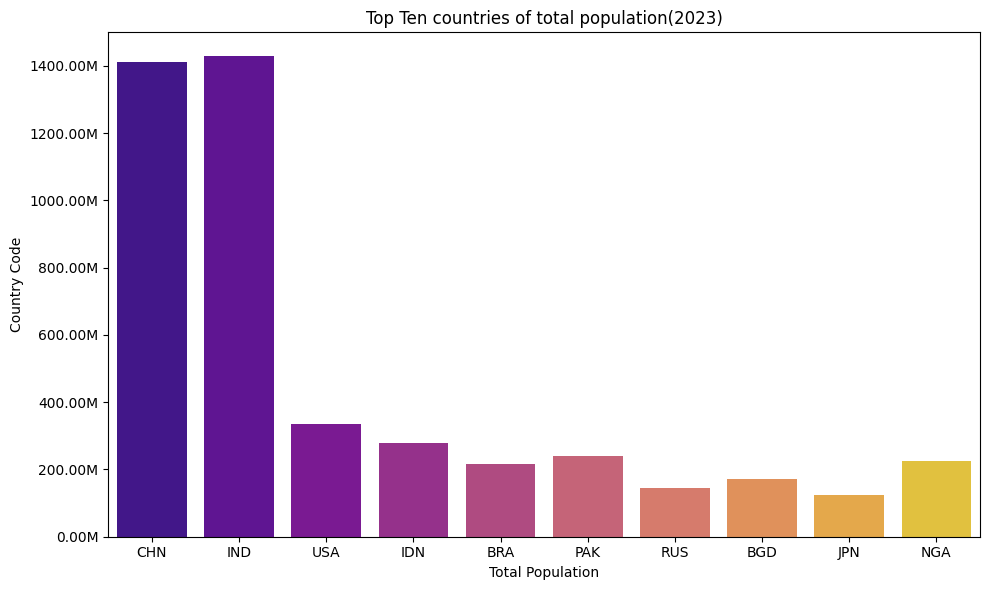

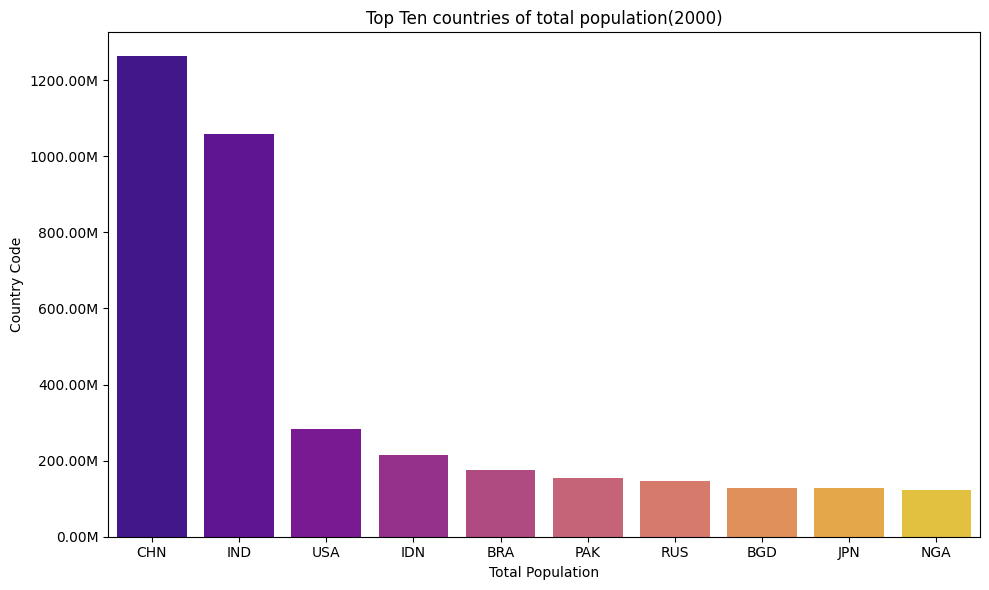

In [ ]:
#for year 2023

plt.figure(figsize=(10, 6))
sns.barplot(x="Country Code", y="2023", data=total_top_ten_countries, palette="plasma", hue="Country Code", dodge=False, legend=False)

plt.title("Top Ten countries of total population(2023)", fontsize=12)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country Code", fontsize=10)
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()



#for year 2000
plt.figure(figsize=(10, 6))
sns.barplot(x="Country Code", y="2000", data=total_top_ten_countries, palette="plasma", hue="Country Code", dodge=False, legend=False)

plt.title("Top Ten countries of total population(2000)", fontsize=12)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country Code", fontsize=10)
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

In [ ]:
#for year 2023
total_population_sorted = data.sort_values(by="2023", ascending=True)

total_population_sorted['Population_Display'] = total_population_sorted['2023'].apply(lambda x: f'{x / 1_000_000:.2f}M')

total_Bottom_ten_countries = total_population_sorted.head(10)

print("Bottom ten countries of total population (2023)\n")
print(total_Bottom_ten_countries[['Country Name', '2023']])


print("\nFormatted population display (in millions) for the Bottom 10 countries:")
print(total_Bottom_ten_countries[['Country Name', 'Population_Display']])

#for year 2000

total_population_sorted = data.sort_values(by="2000", ascending=True)

total_population_sorted['Population_Display'] = total_population_sorted['2000'].apply(lambda x: f'{x / 1_000_000:.2f}M')

total_bootom_ten_countries = total_population_sorted.head(10)

print("Bottom ten countries of total population (2000)\n")
print(total_bootom_ten_countries[['Country Name', '2000']])


print("\nFormatted population display (in millions) for the Bottom 10 countries:")
print(total_bootom_ten_countries[['Country Name', 'Population_Display']])

Bottom ten countries of total population (2023)

                  Country Name     2023
245                     Tuvalu  11396.0
179                      Nauru  12780.0
188                      Palau  18058.0
255     British Virgin Islands  31538.0
147   St. Martin (French part)  32077.0
84                   Gibraltar  32688.0
212                 San Marino  33642.0
149                     Monaco  36297.0
137              Liechtenstein  39584.0
225  Sint Maarten (Dutch part)  41163.0

Formatted population display (in millions) for the Bottom 10 countries:
                  Country Name Population_Display
245                     Tuvalu              0.01M
179                      Nauru              0.01M
188                      Palau              0.02M
255     British Virgin Islands              0.03M
147   St. Martin (French part)              0.03M
84                   Gibraltar              0.03M
212                 San Marino              0.03M
149                     Monaco        

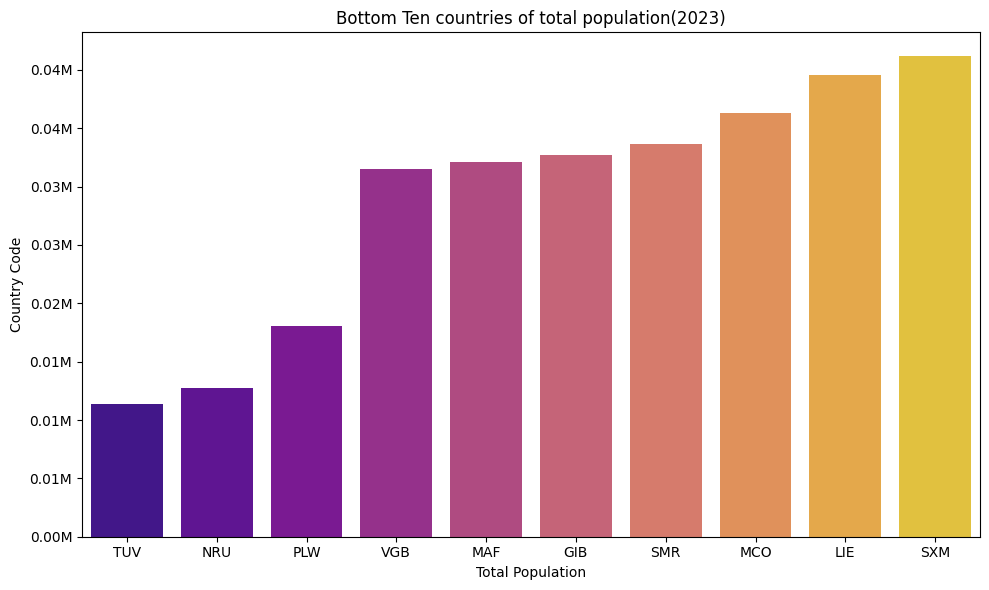

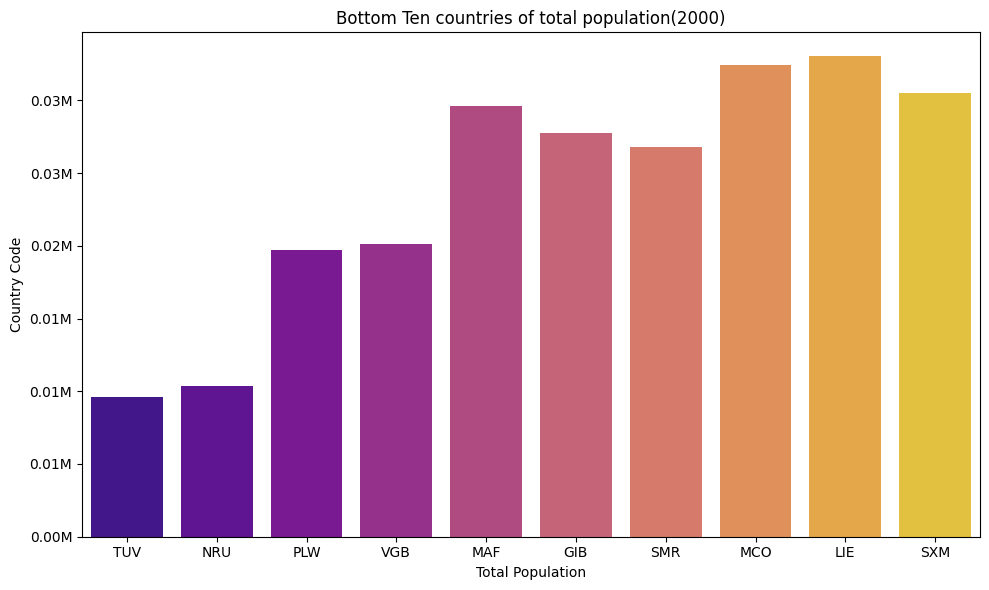

In [ ]:
#for year 2023

plt.figure(figsize=(10, 6))
sns.barplot(x="Country Code", y="2023", data=total_Bottom_ten_countries, palette="plasma", hue="Country Code", dodge=False, legend=False)

plt.title("Bottom Ten countries of total population(2023)", fontsize=12)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country Code", fontsize=10)
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()



#for year 2000
plt.figure(figsize=(10, 6))
sns.barplot(x="Country Code", y="2000", data=total_Bottom_ten_countries, palette="plasma", hue="Country Code", dodge=False, legend=False)

plt.title("Bottom Ten countries of total population(2000)", fontsize=12)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country Code", fontsize=10)
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

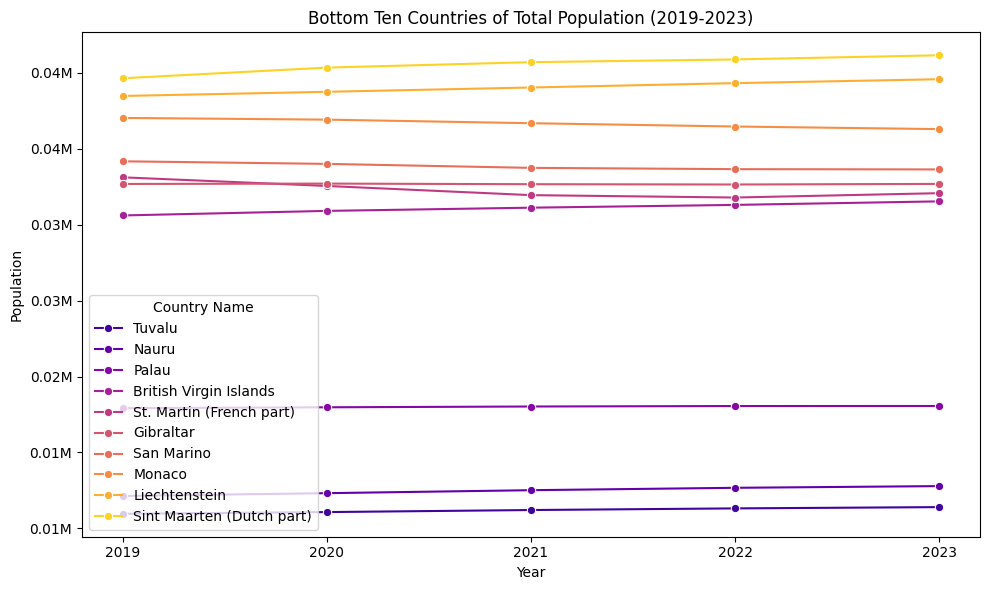

In [ ]:
df_filtered_bottom = total_Bottom_ten_countries[['Country Name', '2019', '2020', '2021', '2022', '2023']]

# Step 2: Reshape the data to long format
df_melted = df_filtered_bottom.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

# Step 3: Create a line plot
plt.figure(figsize=(10, 6))

sns.lineplot(x="Year", y="Population", hue="Country Name", data=df_melted, marker="o", palette="plasma")

# Customize plot labels and title
plt.title("Bottom Ten Countries of Total Population (2019-2023)", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Population", fontsize=10)

# Format the y-axis to show population in millions
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

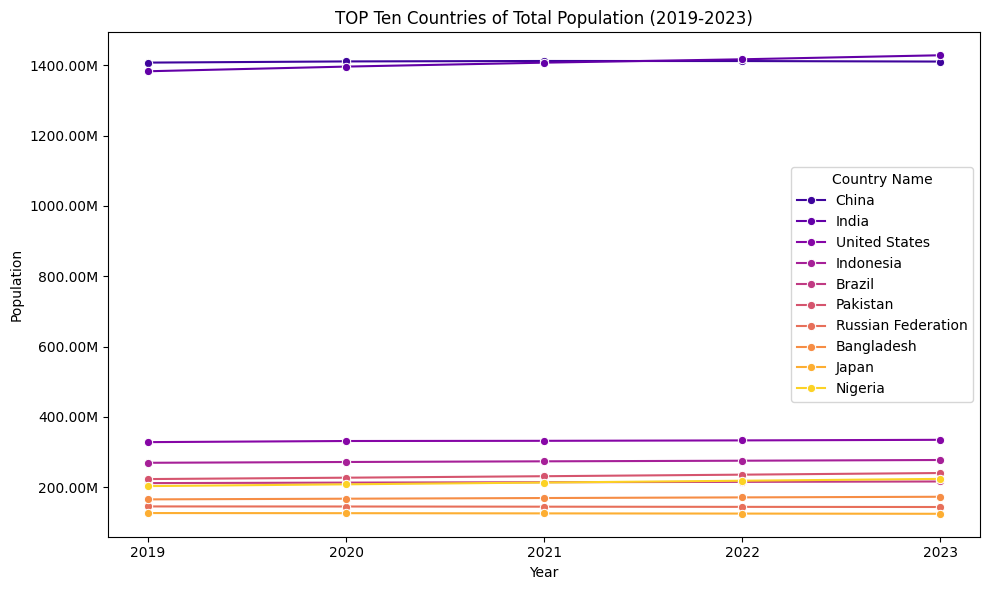

In [ ]:
df_filtered_top = total_top_ten_countries[['Country Name', '2019', '2020', '2021', '2022', '2023']]

# Step 2: Reshape the data to long format
df_melted = df_filtered_top.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')

# Step 3: Create a line plot
plt.figure(figsize=(10, 6))

sns.lineplot(x="Year", y="Population", hue="Country Name", data=df_melted, marker="o", palette="plasma")

# Customize plot labels and title
plt.title("TOP Ten Countries of Total Population (2019-2023)", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Population", fontsize=10)

# Format the y-axis to show population in millions
plt.gca().set_yticklabels([f'{x / 1_000_000:.2f}M' for x in plt.gca().get_yticks()])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()